<a href="https://colab.research.google.com/github/aeskandari68/Deep-Learning/blob/main/Computer-Vision/CIfar10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 3s 0us/step
X train size: (50000, 32, 32, 3), y train size: (50000, 1)
X test size: (10000, 32, 32, 3), y test size: (10000, 1)


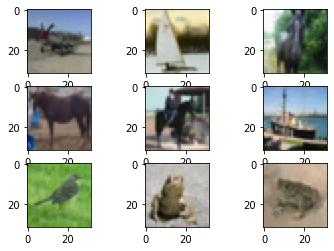

In [ ]:
# eaxample of loading an image in cifcar10
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np

# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# print sizes of training and test datasets
print('X train size: %s, y train size: %s' % (X_train.shape, y_train.shape))
print('X test size: %s, y test size: %s' % (X_test.shape, y_test.shape))
# plot some images
arr = np.random.choice(range(X_train.shape[0]), 9, replace=False)
for n, i in enumerate(arr):
  plt.subplot(330 + 1 + n)
  plt.imshow(X_train[i])

plt.show()

In [ ]:
from sys import version
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

def load_dataset(): 
  (X_train, y_train), (X_test, y_test) = cifar10.load_data()
  # reshape the images to have a single chanel
  X_train = X_train.reshape((X_train.shape[0], 32, 32, 3))
  X_test = X_test.reshape((X_test.shape[0], 32, 32, 3))
  # one hot encoding the classes
  y_train, y_test = to_categorical(y_train), to_categorical(y_test)
  return X_train, y_train, X_test, y_test

def prepresess_imgs(X_train, X_test):
  # Convert images to float
  X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
  # Normalize images
  X_train, X_test = X_train/255.0, X_test/255.0
  return X_train, X_test

def model_define():
  model = Sequential()
  # ....
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same', input_shape= (32, 32, 3)))
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# evaluate a model using k-fold cross-validation
def evalute_model(dataX, dataY, n_folds= 5):
  # evalute the model using k-fold cv
  scores, hist = list(), list()
  kfold = KFold(n_folds, shuffle= True, random_state= 1)
  # enumurate and split
  for train_i, test_i in kfold.split(dataX):
    # define model
    model = model_define()
    # select data for trainig and testing of each models
    X_train, y_train, X_test, y_test = dataX[train_i], dataY[train_i], dataX[test_i], dataY[test_i]
    # fit model
    history = model.fit(X_train, y_train, batch_size= 32, epochs= 10, validation_data= (X_test, y_test), verbose= 0)
    # evaluate model
    loss, acc = model.evaluate(X_test, y_test, verbose= 0)
    print('>> %3f' % (acc * 100.0))
    #append scores
    scores.append(acc)
    hist.append(history)
  return scores, hist

def learning_curves(histories):
  plt.subplot(211)
  # plot loss
  plt.title('Cross Entropy Loss')
  plt.plot(histories.history['loss'], color='blue', label='train')
  plt.plot(histories.history['val_loss'], color='red', label='test')
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(histories.history['accuracy'], color='blue', label='train')
  plt.plot(histories.history['val_accuracy'], color='red', label='test')  
  plt.show()

def run_model():
   # load dataset
   X_train, y_train, X_test, y_test = load_dataset()
   # prepare images
   X_train, X_test = prepresess_imgs(X_train, X_test)
   # define model
   model = model_define()
   # fir model
   history = model.fit(X_train, y_train, batch_size= 64, epochs= 100, validation_data= (X_test, y_test), verbose= 0)
   # Evaluate model
   _, acc = model.evaluate(X_test, y_test, verbose= 0)
   print('>> %3f' % (acc * 100.0))
   # learning curves
   learning_curves(history)

>> 66.149998


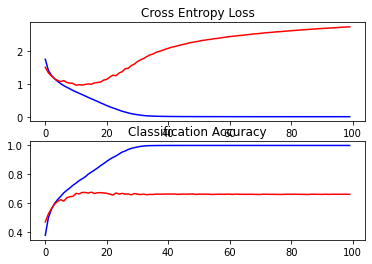

In [ ]:
run_model()

In [ ]:
def model_define():
  model = Sequential()
  # ....
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same', input_shape= (32, 32, 3)))
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

>> 70.709997


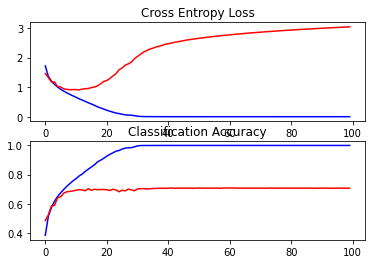

In [ ]:
run_model()

In [ ]:
def model_define():
  model = Sequential()
  # ....
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same', input_shape= (32, 32, 3)))
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

>> 74.440002


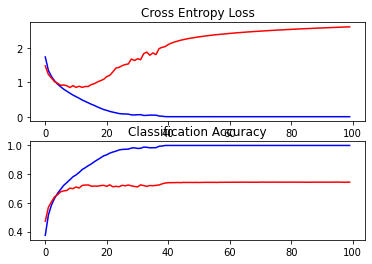

In [ ]:
run_model()

The model performance on training set is reasanble but it suffers from overfitting problem, to do so we can follow different regularization methods like:
**Dropout,**
**Weight Decay,**
**Early Stopping, Data Agumentation**

In [ ]:
# Effects of Dropout
from keras.layers import Dropout
def model_define():
  model = Sequential()
  # ....
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same', input_shape= (32, 32, 3)))
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

>> 81.819999


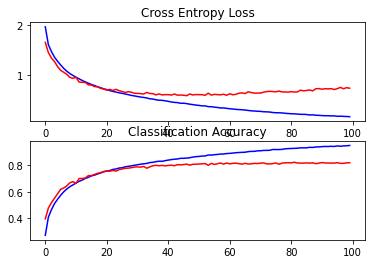

In [ ]:
run_model()

In [ ]:
# using data agumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def run_model():
   # load dataset
   X_train, y_train, X_test, y_test = load_dataset()
   # prepare images
   X_train, X_test = prepresess_imgs(X_train, X_test)
   # define model
   model = model_define()
   # Agument data
   datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
   # prepare iterator
   it_train = datagen.flow(X_train, y_train, batch_size=64)
   # fit model
   steps = int(X_train.shape[0] / 64)
   history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(X_test, y_test), verbose=0)
   # evaluate model
   _, acc = model.evaluate(X_test, y_test, verbose= 0)
   print('>> %3f' % (acc * 100.0))
   # learning curves
   learning_curves(history)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


>> 83.870000


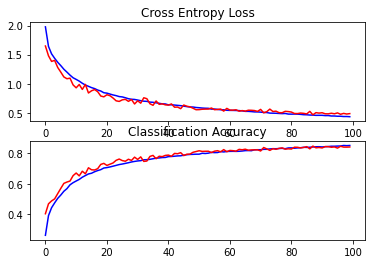

In [ ]:
run_model()

Using data agumentation and different dropouts at different layers

In [ ]:
def model_define():
  model = Sequential()
  # ....
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same', input_shape= (32, 32, 3)))
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.5))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


>> 74.669999


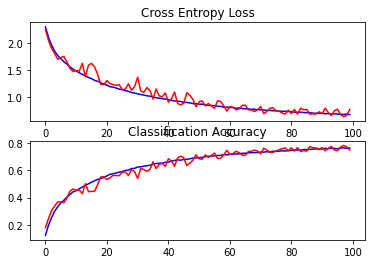

In [ ]:
run_model()

We can also add batchnomalization to the model

In [ ]:
from keras.layers import BatchNormalization
def model_define():
  model = Sequential()
  # ....
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same', input_shape= (32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.5))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# Model using Batch normalization, dropout and data agumentation
run_model()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Using adam optimizer instrad of SGD

In [ ]:
def model_define():
  model = Sequential()
  # ....
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same', input_shape= (32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), activation= 'relu', kernel_initializer='he_uniform',  padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.5))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  # compile model
  #opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# Model using Batch normalization, dropout and data agumentation, and adam optimizer
run_model()